In [3]:
%load_ext autoreload
%autoreload 2

import os
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from multiprocess import Pool  # its fork for multiprocessing that works fine for me
from scipy import stats
from tqdm import tqdm

from src import abt, utils


In [ ]:

манна уитни

аа тест

руками вводить мощность и p-value

как определять 

тест на нормальность (шапиро-уилка)

mde (minimal detectable effect) -- бутстрап или permutation test

тест манна-уитни, т-тест, бутстрап, перестановочный

In [ ]:
TODO: multiproccessing, mannwhitney for medians (med1 = med2)

In [4]:
alpha = 0.05
beta = 0.2
means_diff = 0.1
std = 2.1
print(
    abt.lower_bound(alpha, beta, means_diff, std),
    abt.lower_bound_statsmodels(alpha, beta, means_diff, std)
)

6922.711925695897 6923.655464656396


/Users/artemiy/anaconda3/envs/general/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/artemiy/anaconda3/envs/general/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/artemiy/anaconda3/envs/general/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/artemiy/anaconda3/envs/general/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [35]:
def run_experiment(_):
    control_group = np.random.binomial(n=1, p=8e-2, size=sample_size)
    treatment_group = np.random.binomial(n=1, p=9e-2, size=sample_size)

    t_stat, p_value_t = stats.ttest_ind(
        control_group, treatment_group, alternative="less")
    t_stat, p_value_m = stats.mannwhitneyu(
        control_group, treatment_group, alternative="less")
    p_value_b, _ = abt.bootstrap(
        control_group, treatment_group, num_samples=1000)
    p_value_bc, _ = abt.bootstrap_concat(
        control_group, treatment_group, num_samples=1000)
    p_value_p = abt.permutation(
        control_group, treatment_group, num_permutations=10000)
    p_value_ps = 1 - abt.permutation_shares(sum(control_group), len(
        control_group), sum(treatment_group), len(treatment_group))

    change_detected = {
        "ttest": int(p_value_t < alpha),
        "mannwhitneyu": int(p_value_m < alpha),
        "bootstrap": int(p_value_b < alpha),
        "bootstrap_concat": int(p_value_bc < alpha),
        "permutation": int(p_value_p < alpha),
        "permutation_share": int(p_value_ps < alpha),
    }

    return change_detected


sample_size = 7000
num_experiments = 200
alpha = 0.1

num_processes = os.cpu_count()  # = 8

with Pool(num_processes) as pool:
    results = pool.map(run_experiment, range(num_experiments))

change_detected = defaultdict(int)
for result in results:
    for key, value in result.items():
        change_detected[key] += value

share = {k: v/num_experiments for k, v in change_detected.items()}

print(pd.Series(share))

ttest                0.77
mannwhitneyu         0.77
bootstrap            0.77
bootstrap_concat     0.77
permutation          0.77
permutation_share    0.77
dtype: float64


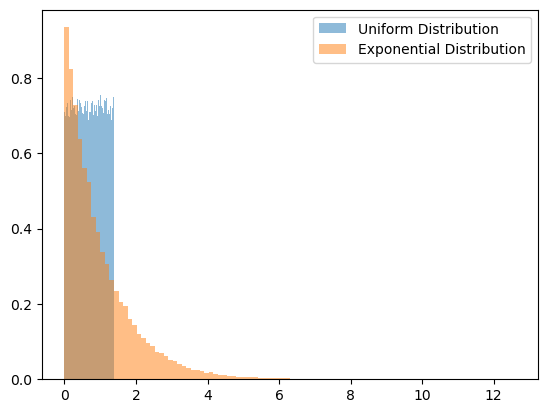

meds
0.6948542979951258 0.6957476334487243
means
0.6942202253501056 1.0039094419966212


In [32]:
data1 = np.random.uniform(0, 2*np.log(2), size=int(1e5))
data2 = np.random.exponential(scale=1, size=int(1e5))

plt.hist(data1, bins=50, density=True, alpha=0.5, label='Uniform Distribution')
plt.hist(data2, bins=100, density=True, alpha=0.5, label='Exponential Distribution')
plt.legend()
plt.show()


print("meds")
print(np.median(data1), np.median(data2))
print("means")
print(np.mean(data1), np.mean(data2))

In [11]:
sample_size = 5000
num_experiments = 4000
alpha = 0.05

num_processes = os.cpu_count()  # = 8


def run_experiment(_):
    control_group = np.random.uniform(0, 2 * np.log(2), size=sample_size)
    treatment_group = np.random.exponential(scale=1, size=sample_size)

    t_stat, p_value_m = stats.mannwhitneyu(control_group, treatment_group)

    change_detected = {
        "mannwhitneyu": int(p_value_m < alpha),
    }

    return change_detected


change_detected = defaultdict(int)
with Pool(num_processes) as pool:
    results = pool.map(run_experiment, range(num_experiments))

for result in results:
    for key, value in result.items():
        change_detected[key] += value

share = {k: v / num_experiments for k, v in change_detected.items()}

print(pd.Series(share))

mannwhitneyu    1.0
dtype: float64


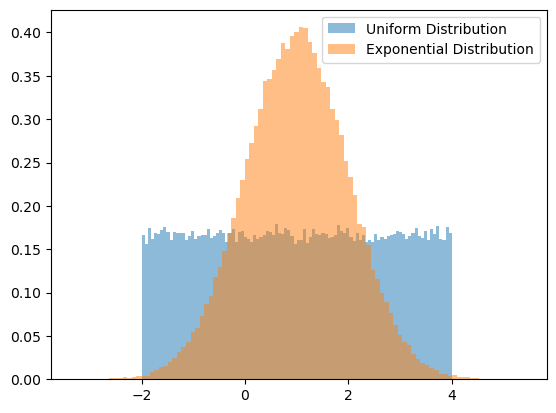

(0.9933961484256563, 1.002380140327201)

In [34]:
data1 =  np.random.uniform(-2, 4, size=int(1e5))
data2 =  np.random.normal(loc=1, scale=1, size=int(1e5))

plt.hist(data1, bins=100, density=True, alpha=0.5, label='Uniform Distribution')
plt.hist(data2, bins=100, density=True, alpha=0.5, label='Exponential Distribution')
plt.legend()
plt.show()

np.median(data1), np.median(data2)

In [9]:
sample_size = 5000
num_experiments = 4000
alpha = 0.05

num_processes = os.cpu_count()  # = 8


def run_experiment(_):
    control_group = np.random.uniform(-2, 4, size=sample_size)
    treatment_group = np.random.normal(loc=1, scale=1, size=sample_size)

    t_stat, p_value_m = stats.mannwhitneyu(control_group, treatment_group, alternative="less")

    change_detected = {
        "mannwhitneyu": int(p_value_m < alpha),
    }

    return change_detected


change_detected = defaultdict(int)
with Pool(num_processes) as pool:
    results = pool.map(run_experiment, range(num_experiments))

for result in results:
    for key, value in result.items():
        change_detected[key] += value

share = {k: v / num_experiments for k, v in change_detected.items()}

print(pd.Series(share))

mannwhitneyu    0.058
dtype: float64


In [15]:
sample_size = 5000
num_experiments = 4000
alpha = 0.05

num_processes = os.cpu_count()  # = 8


def run_experiment(_):
    control_group = np.random.uniform(-10, 10, size=sample_size)
    treatment_group = np.random.uniform(-100, 100, size=sample_size)

    t_stat, p_value_m = stats.mannwhitneyu(control_group, treatment_group, alternative="less")

    change_detected = {
        "mannwhitneyu": int(p_value_m < alpha),
    }

    return change_detected


change_detected = defaultdict(int)
with Pool(num_processes) as pool:
    results = pool.map(run_experiment, range(num_experiments))

for result in results:
    for key, value in result.items():
        change_detected[key] += value

share = {k: v / num_experiments for k, v in change_detected.items()}

print(pd.Series(share))

mannwhitneyu    0.082
dtype: float64


In [13]:
# Подключим библиотеки
import scipy.stats as sps
from tqdm.notebook import tqdm # tqdm – библиотека для визуализации прогресса в цикле
from statsmodels.stats.proportion import proportion_confint
import numpy as np
 
# Заводим счетчики количества отвергнутых гипотез для Манна-Уитни и для t-test
mann_bad_cnt = 0
ttest_bad_cnt = 0
 
# Прогоняем критерии 1000 раз
sz = 4000
for i in tqdm(range(sz)):
    # Генерируем распределение
    test = sps.uniform(loc=-1, scale=2).rvs(5000) # U[-1, 1]
    control = sps.uniform(loc=-100, scale=200).rvs(5000) # U[-100, 100]
     
    # Считаем pvalue
    mann_pvalue = sps.mannwhitneyu(control, test, alternative='two-sided').pvalue
    ttest_pvalue = sps.ttest_ind(control, test, alternative='two-sided').pvalue
     
    # отвергаем критерий на уровне 5%
    if mann_pvalue < 0.05:
        mann_bad_cnt += 1
 
    if ttest_pvalue < 0.05:
        ttest_bad_cnt += 1
 
# Строим доверительный интервал для уровня значимости критерия (или для FPR критерия)
left_mann_level, right_mann_level = proportion_confint(count = mann_bad_cnt, nobs = sz, alpha=0.05, method='wilson')
left_ttest_level, right_ttest_level = proportion_confint(count = ttest_bad_cnt, nobs = sz, alpha=0.05, method='wilson')
# Выводим результаты
print(f"Mann-whitneyu significance level: {round(mann_bad_cnt / sz, 4)}, [{round(left_mann_level, 4)}, {round(right_mann_level, 4)}]")
print(f"T-test significance level: {round(ttest_bad_cnt / sz, 4)}, [{round(left_ttest_level, 4)}, {round(right_ttest_level, 4)}]")


  0%|          | 0/4000 [00:00<?, ?it/s]

Mann-whitneyu significance level: 0.1065, [0.0973, 0.1164]
T-test significance level: 0.05, [0.0437, 0.0572]
